# Exploring Poplation Growth

## Notes

This notebook uses [Maxima](http://maxima.sourceforge.net/) and the [Maxima Jupyter kernel](https://github.com/robert-dodier/maxima-jupyter).

## Setup

Preperatory steps for using Maxima in Jupyter:

In [1]:
set_plot_option([svg_file, "./maxplot.svg"])$

## Rate of Growth, Try 1

### Simple Logistics Equation

From the [Wikipedia article](https://en.wikipedia.org/wiki/Logistic_function) that describes population at time _t_:

$$P(t)=\frac{K}{1 + \frac{K - P_0}{P_0}e^{-rt}}$$

where $K$ is the carrying capacity of the area in question, $P_0$ is the population at $t=0$, and $r$ is the rate of growth. We give these some initial values here:

In [2]:
K:200;
P_0:150;
t_n:(60*60*24*365.25);
r:1/t_n;

(%o2)                                 200

(%o3)                                 150

(%o4)                             3.15576e+7

(%o5)                        3.168808781402895e-8

Note that initially we ... `r:0.0000001;`.

With the values above substituted in the equation, we get:

In [3]:
growth_eqn:(K/(1 + (K - P_0)/P_0 * %e^(-r*t)));

                                     200
(%o6)                   ------------------------------
                          - 3.168808781402895e-8 t
                        %e
                        -------------------------- + 1
                                    3

Note that we can get the latex for an expression, should we need to use it elsewhere, via the following:

In [4]:
tex(''growth_eqn);

(%o7)                                false

$$\frac{200}{\frac{e^ {- 3.168808781402895 \times 10^{-8}\,t }}{3}+1}$$


Now we can plot it over a year's timespan:

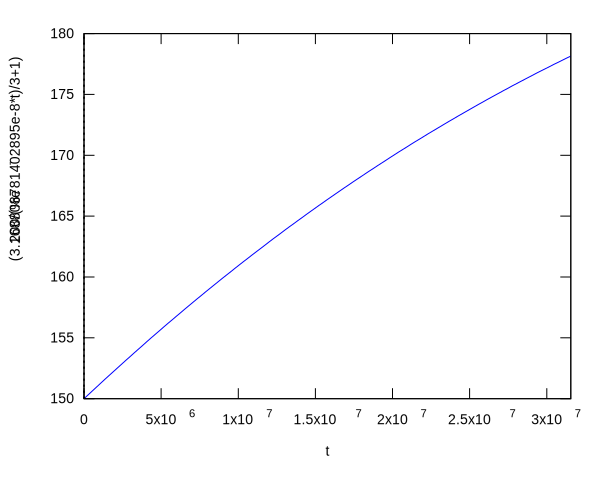

(%o9) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [6]:
plot2d(growth_eqn, [t, 0, t_n]);

or over 10 years:

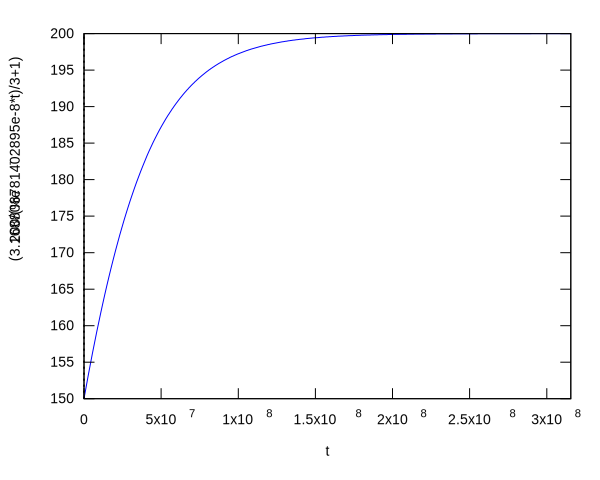

(%o10) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [7]:
plot2d(growth_eqn, [t, 0, 10*t_n]);

## Oscillating Stable Population

Next, we want to think about population dynamics with times of growth and die-off. To do this, we'll simply add a periodic component to our equation:

In [8]:
osc_eqn:K/50 * sin(t*r);
eqn:growth_eqn + osc_eqn;

(%o11)                   4 sin(3.168808781402895e-8 t)

                     200
(%o12)  ------------------------------ + 4 sin(3.168808781402895e-8 t)
          - 3.168808781402895e-8 t
        %e
        -------------------------- + 1
                    3

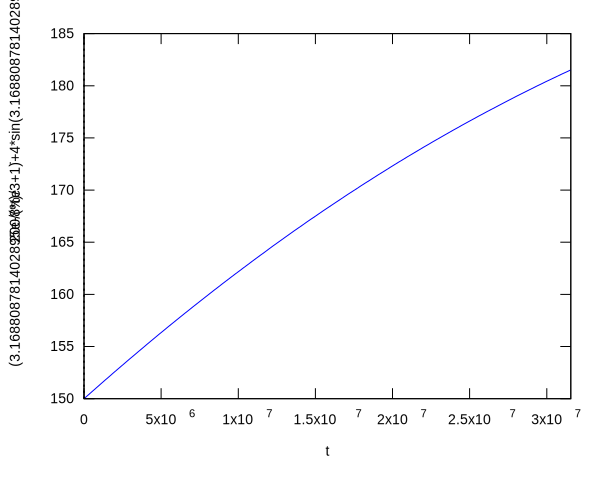

(%o13) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [9]:
plot2d(eqn, [t, 0, t_n]);

Over a period of a year, we don't see much with the currently defined constants, but given 10 years, we start to see a wobble:

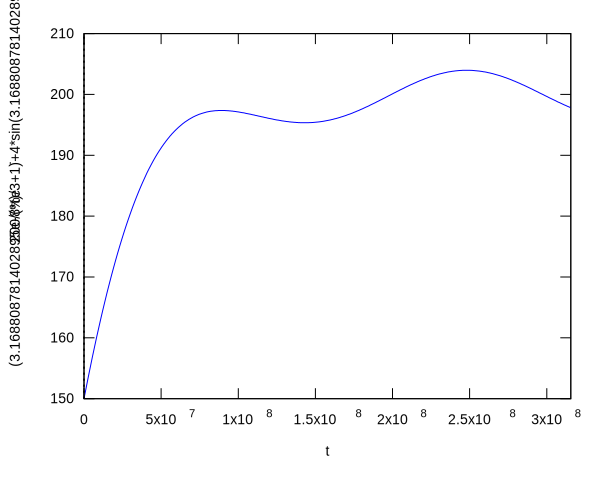

(%o14) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [10]:
plot2d(eqn, [t, 0, 10*t_n]);

and at 20 years, it's even more noticible:

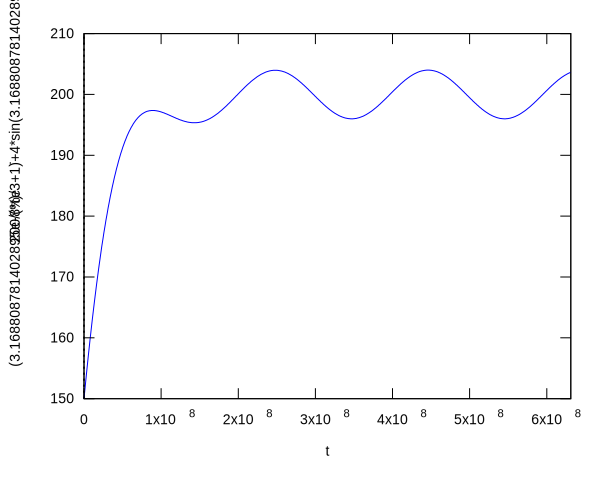

(%o15) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [11]:
plot2d(eqn, [t, 0, 20*t_n]);

## Rate of Growth, Try 2

### Simple Logistics Equation

We'll use the same constants and equation as we defined above for the growth equation. 

### Oscillating Part

However, for the oscillation part of the equation, we'll make some changes:

In [12]:
osc_eqn:K/50*sin(t*r*%pi*2);

(%o16)                 4 sin(6.33761756280579e-8 %pi t)

This gives us something that more resembles annual growth cycles (note that for the 20-year span below, there are 20 maxima/minima pairs):

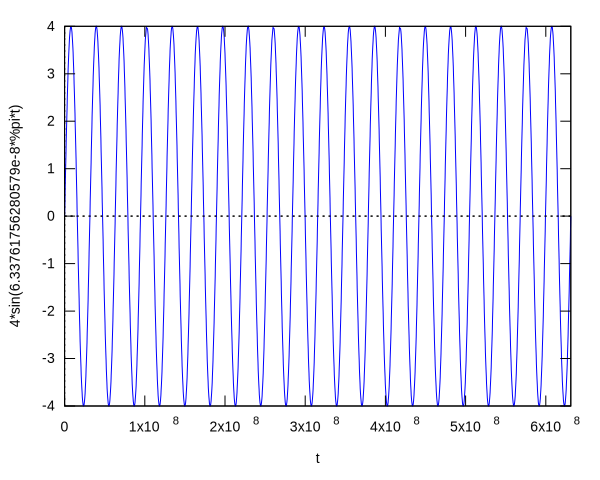

(%o17) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [13]:
plot2d(osc_eqn, [t, 0, 20*t_n]);

### Dampening Part

We'd also like to simulate an initial surge in growth that fades over time, stabilizing to simple periodic cycles. To do this, we'll use a dampening function.

In [14]:
damp_eqn:%e^(-r*t/4)*K/4*sin(t*r*%pi*2);

              - 7.922021953507237e-9 t
(%o18)   50 %e                         sin(6.33761756280579e-8 %pi t)

Again, we use values that give us year-based cycles of increase and decline:

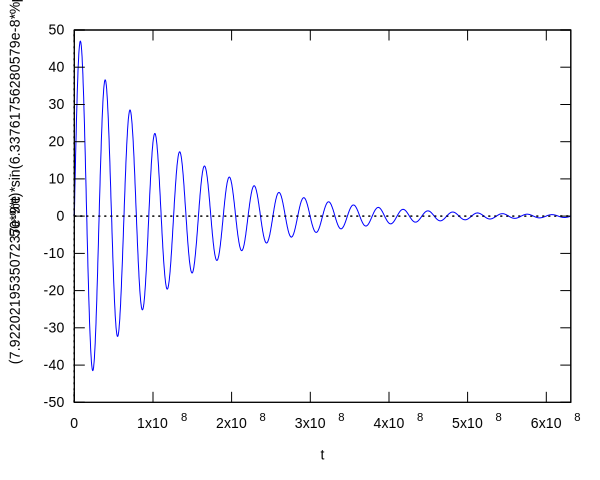

(%o19) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [15]:
plot2d(damp_eqn, [t, 0, 20*t_n]);

### Combined Eqation

Bringing these all together, we get the following:

In [16]:
eqn:growth_eqn + osc_eqn + damp_eqn;

            - 7.922021953507237e-9 t
(%o20) 50 %e                         sin(6.33761756280579e-8 %pi t)
                                                              200
            + 4 sin(6.33761756280579e-8 %pi t) + ------------------------------
                                                   - 3.168808781402895e-8 t
                                                 %e
                                                 -------------------------- + 1
                                                             3

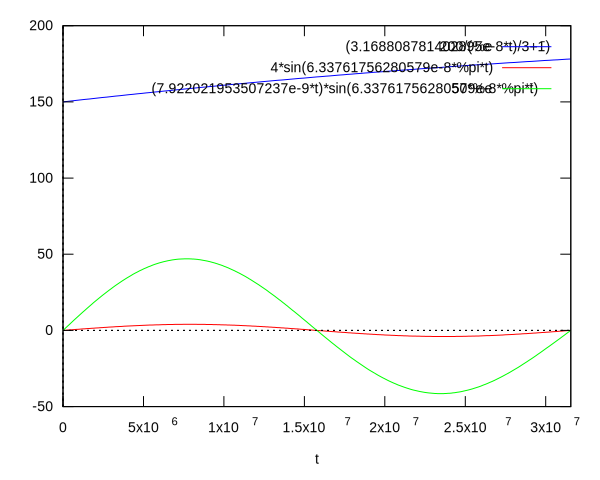

(%o21) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [17]:
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, t_n]);

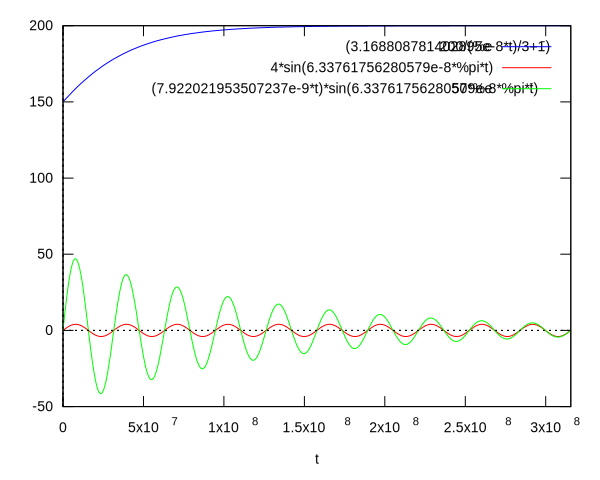

(%o22) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [18]:
plot2d([growth_eqn,osc_eqn,damp_eqn], [t, 0, 10*t_n]);

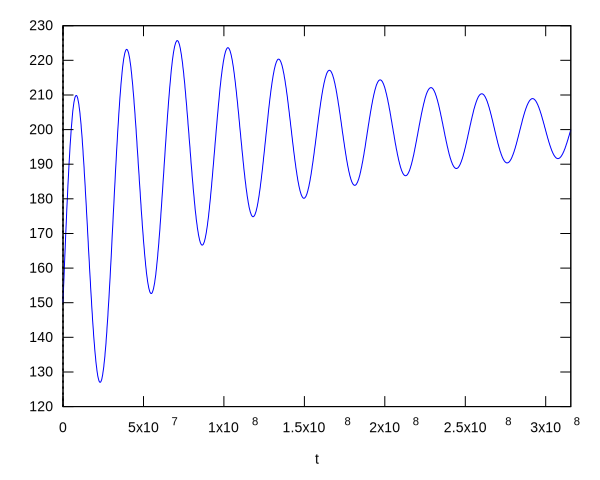

(%o23) [/var/folders/_j/0spgkqmj781_drg31_1tzgtr0000gn/T/maxout30197.gnuplot, 
                                                                 ./maxplot.svg]

In [19]:
plot2d([eqn], [t, 0, 10*t_n]);